# Latency Comparison

latency saving ratio range is [0.169617482675262,  0.47824837044296353]


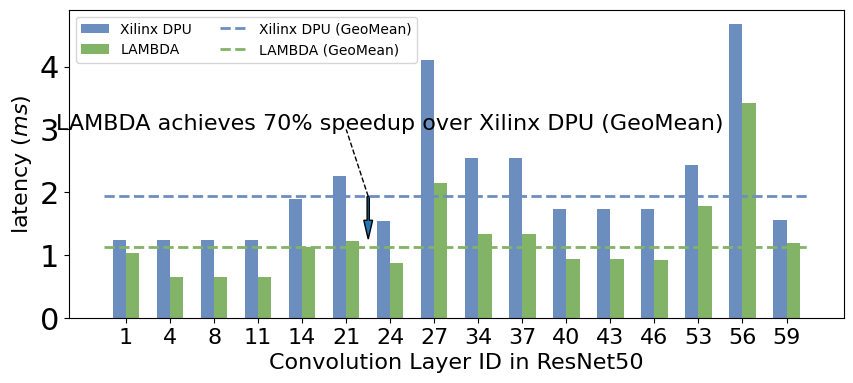

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

##### Default Parameters
color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656","#23445D"]
# Style for the added patch
style = "Simple, tail_width=0.5, head_width=4, head_length=8"
kw = dict(arrowstyle=style, color="k")

# latency = [[0.364,1.241,3.52,1.242,1.241,1.241,1.891,1.559,2.259,1.545,4.1,2.583,2.547,2.551,1.726,1.726,1.725,2.635,2.433,4.673,1.549],[1.314488649,1.030504704,1.804955006,0.650472641,0.6486463547,0.649600029,1.11974597,3.076827526,1.22366786,0.8738791943,2.147263288,4.394212961,1.337183714,1.330988407,0.9275352955,0.9316790104,0.9204244614,4.940673113,1.776784658,3.425372839,1.195193529]]
latency = [[1.241, 1.242, 1.241, 1.241, 1.891, 2.259, 1.545, 4.1, 2.547, 2.551, 1.726, 1.726, 1.725, 2.433, 4.673, 1.549],
[1.030504704, 0.650472641, 0.6486463547, 0.649600029, 1.11974597, 1.22366786, 0.8738791943, 2.147263288, 1.337183714, 1.330988407, 0.9275352955, 0.9316790104, 0.9204244614, 1.776784658, 3.425372839, 1.195193529]]

x = [i for i in range(len(latency[1]))]

# Create figure
fig = plt.figure(figsize=[10,4])
ax = plt.subplot(111)
barWidth=0.3
acu_matrix = []
sum_matrix = [latency[0]]
for i in range(len(sum_matrix)): 
    if i == 0:
        acu_matrix.append(sum_matrix[0])
    else:
        temp = []
        for j in range(len(sum_matrix[i])):
            temp.append(acu_matrix[i-1][j] + sum_matrix[i][j])
        acu_matrix.append(temp)

plt_handler = []

for i in range(len(x)):
    for j in range(len(acu_matrix)):
        if j==0:
            plt.bar(x[i]-barWidth/2, sum_matrix[j][i], width=barWidth, bottom=0, color=color_list[j])
        else:
            plt.bar(x[i]-barWidth/2, sum_matrix[j][i], width=barWidth, bottom=0, color=color_list[j])
        
        if i == len(x) - 1:
            if j==0:
                plt_handler.append(plt.bar(x[i]-barWidth/2, sum_matrix[j][i], width=barWidth, bottom=0, color=color_list[0]))
            else:
                plt_handler.append(plt.bar(x[i]-barWidth/2, sum_matrix[j][i], width=barWidth, bottom=0, color=color_list[0]))

acu_matrix_subnet_reuse = []
sum_matrix_subnet_reuse = [latency[1]]
for i in range(len(sum_matrix_subnet_reuse)):
    if i == 0:
        acu_matrix_subnet_reuse.append(sum_matrix_subnet_reuse[0])
    else:
        temp = []
        for j in range(len(sum_matrix_subnet_reuse[i])):
            temp.append(acu_matrix_subnet_reuse[i-1][j] + sum_matrix_subnet_reuse[i][j])
        acu_matrix_subnet_reuse.append(temp)

for i in range(len(x)):
    for j in range(len(acu_matrix_subnet_reuse)):
        if j==0:
            plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=0, color=color_list[1])
        else:
            plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=0, color=color_list[1])
        
        if i == len(x) - 1:
            if j==0:
                plt_handler.append(plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=0, color=color_list[1]))
            else:
                plt_handler.append(plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=0, color=color_list[1]))

print(f"latency saving ratio range is [{1-np.max(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))},  {1-np.min(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))}]")

SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 22
plt.xlabel(r"Convolution Layer ID in ResNet50", fontsize=SMALL_SIZE)
plt.ylabel(r"latency $(ms)$", fontsize=SMALL_SIZE)
# plt.xticks(x, [f"{i}" for i in [0, 1, 2, 4, 8, 11, 14, 17, 21, 24, 27, 30, 34, 37, 40, 43, 46, 49, 53, 56, 59]], fontsize=SMALL_SIZE)
plt.xticks(x, [f"{i}" for i in [1, 4, 8, 11, 14, 21, 24, 27, 34, 37, 40, 43, 46, 53, 56, 59]], fontsize=SMALL_SIZE)
# plt.yticks([15,30,45,60,75], fontsize=BIGGER_SIZE)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.ylim((min(accuracy_pre_train)*0.5,max(accuracy_post_train)*1.1))
# plt.legend(plt_handler, [r"Xilinx DPU", r"LAMBDA"], fontsize=SMALL_SIZE)
geomean= [np.prod(latency[0])**(1/len(latency[0])), np.prod(latency[1])**(1/len(latency[1]))]
# plt.plot([-0.5, 17.5], [geomean[0], geomean[0]], linewidth=2, color=color_list[0], linestyle="--")
# plt.plot([-0.5, 17.5], [geomean[1], geomean[1]], linewidth=2, color=color_list[1], linestyle="--")
plt_handler.append(plt.plot([-0.5, 15.5], [geomean[0], geomean[0]], linewidth=2, color=color_list[0], linestyle="--")[0])#, marker = 'o'))
plt_handler.append(plt.plot([-0.5, 15.5], [geomean[1], geomean[1]], linewidth=2, color=color_list[1], linestyle="--")[0])#, marker = 'o'))
# ax.annotate('SushiAccel Speedup 19.5% over Xilinx DPU', xy=(4, np.mean(latency[1])), xytext=(4, 2.2), arrowprops=dict(facecolor='black', shrink=0.005))
ax.arrow(5.5, np.prod(latency[0])**(1/len(latency[0])), 0, -0.38, head_width = 0.2, width = 0.05)
plt.text(7, 3, f'LAMBDA achieves {(geomean[0]/geomean[1]-1)*100:0.0f}% speedup over Xilinx DPU (GeoMean)', horizontalalignment='center')
plt.legend(plt_handler, [r"Xilinx DPU", r"LAMBDA",r"Xilinx DPU (GeoMean)", r"LAMBDA (GeoMean)"], ncol=2, fontsize=10)
plt.plot([5.5, 5], [geomean[0], 3], linewidth=1, color="k", linestyle="--")
# plt.text(20, np.mean(latency[1]), 'SushiAccel GeoMean', horizontalalignment='center', color=color_list[0])
# plt.text(20, np.mean(latency[0]), 'Xilinx GeoMean', horizontalalignment='center', color=color_list[1])
plt.savefig(r'Latency_Comparison_LAMBDA_DPU.pdf', bbox_inches="tight", transparent=True) 
plt.show()

In [94]:
geomean

[1.8703850806194102, 1.4007813736083896]

# Resource Breakdown Comparison

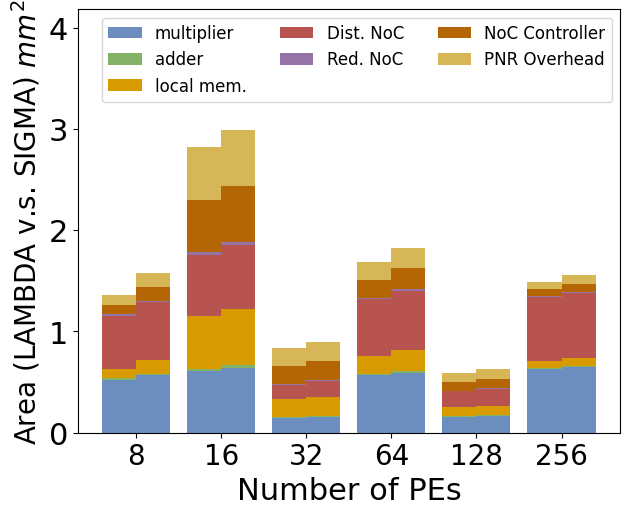

In [45]:
import matplotlib.pyplot as plt
import numpy as np


# multiplier_cost_lambda=[0.56782,0.64078,0.15456,0.15456,0.16603,0.64675,0.2036,0.2036,0.29879,0.2036,1.12808,0.78754]
multiplier_cost_lambda=[0.56782,0.64078,0.15456,0.59204,0.16603,0.64674]
multiplier_cost_sigma=[0.52434,0.60687,0.14251,0.56738,0.15821,0.63368]
adder_cost_lambda=[0.01201,0.02401,0.00801,0.01601,0.00401,0.00851]
adder_cost_sigma=[0.01203, 0.02403, 0.00803, 0.00803, 0.00403, 0.00853]
local_memory_area_lambda=[0.13948, 0.55231, 0.19125, 0.20386, 0.09742, 0.08106]
local_memory_area_sigma=[0.096,0.5184,0.1792,0.1792,0.0896,0.068]
dist_noc_lambda=[0.56782,0.64078,0.15456,0.59204,0.16603,0.64674]
dist_noc_sigma=[0.52434,0.60687,0.14251,0.56738,0.15821,0.63368]
red_noc_lambda=[0.01201,0.02401,0.00801,0.01601,0.00401,0.00851]
red_noc_sigma=[0.01203, 0.02403, 0.00803, 0.00803, 0.00403, 0.00853]
noc_ctrl_lambda=[0.13948, 0.55231, 0.19125, 0.20386, 0.09742, 0.08106]
noc_ctrl_sigma=[0.096,0.5184,0.1792,0.1792,0.0896,0.068]
pnr_overhead_lambda=[0.13948, 0.55231, 0.19125, 0.20386, 0.09742, 0.08106]
pnr_overhead_sigma=[0.096,0.5184,0.1792,0.1792,0.0896,0.068]

color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656","#23445D"]

# create data
fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)

x = [i for i in range(len(multiplier_cost_lambda))]
plt_handler = []
barWidth = 0.4
acu_matrix = []
sum_matrix = [multiplier_cost_sigma, adder_cost_sigma, local_memory_area_sigma, dist_noc_sigma, red_noc_sigma, noc_ctrl_sigma, pnr_overhead_sigma]
for i in range(len(sum_matrix)): 
    if i == 0:
        acu_matrix.append(sum_matrix[0])
    else:
        temp = []
        for j in range(len(sum_matrix[i])):
            temp.append(acu_matrix[i-1][j] + sum_matrix[i][j])
        acu_matrix.append(temp)
max_range = np.max(acu_matrix)


for i in range(len(x)):
    for j in range(len(acu_matrix)):
        if j==0:
            plt.bar(x[i]-0.5*barWidth, sum_matrix[j][i], width=barWidth, bottom=0, color=color_list[j])
        else:
            plt.bar(x[i]-0.5*barWidth, sum_matrix[j][i], width=barWidth, bottom=acu_matrix[j-1][i], color=color_list[j])


acu_matrix = []
sum_matrix = [multiplier_cost_lambda, adder_cost_lambda, local_memory_area_lambda, dist_noc_lambda, red_noc_lambda, noc_ctrl_lambda, pnr_overhead_lambda]
for i in range(len(sum_matrix)): 
    if i == 0:
        acu_matrix.append(sum_matrix[0])
    else:
        temp = []
        for j in range(len(sum_matrix[i])):
            temp.append(acu_matrix[i-1][j] + sum_matrix[i][j])
        acu_matrix.append(temp)
max_range_2 = np.max(acu_matrix)
max_range = np.max([max_range_2,max_range])
for i in range(len(x)):
    for j in range(len(acu_matrix)):
        if j==0:
            if i==0:
                plt_handler.append(plt.bar(x[i]+0.5*barWidth, sum_matrix[j][i], width=barWidth, bottom=0, color=color_list[j]))
            else:
                plt.bar(x[i]+0.5*barWidth, sum_matrix[j][i], width=barWidth, bottom=0, color=color_list[j])
        else:
            if i==0:
                plt_handler.append(plt.bar(x[i]+0.5*barWidth, sum_matrix[j][i], width=barWidth, bottom=acu_matrix[j-1][i], color=color_list[j]))
            else:
                plt.bar(x[i]+0.5*barWidth, sum_matrix[j][i], width=barWidth, bottom=acu_matrix[j-1][i], color=color_list[j])

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel(r"Area (LAMBDA v.s. SIGMA) $mm^2$", fontsize=MEDIUM_SIZE)
plt.xlabel(r"Number of PEs", fontsize=BIGGER_SIZE)
# plt.xlabel(r"$Log_2(N)$ for $N\times N$ PEs", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.ylim([0, max_range*1.4])
plt.xticks(x,["8","16","32","64","128","256"], fontsize=MEDIUM_SIZE)

# plt.legend(plt_handler, ["no layout constraints", "CSWTHT", "CTWSHT", "CTWTHS", "CSWSHT", "CSWTHS", "CTWSHS", "CSWSHS", "CTWSHTD", "CTWTHSD"], loc='upper center', ncol=5, fontsize=SMALL_SIZE)
# plt.legend(plt_handler, ["no layout constraints", "CX32", "WX32", "HX32", "CX4WX8", "CX4HX8", "WX4HX8", "WX4HX8", "WX32D", "HX32D"], loc='upper center', ncol=5, fontsize=SMALL_SIZE)
plt.legend(plt_handler, ["multiplier", "adder", "local mem.", "Dist. NoC", "Red. NoC", "NoC Controller", "PNR Overhead"], loc='best', ncol=3, fontsize=12)
# Conv->BN->ReLU->MaxPooling 

plt.savefig('resource_breakdown.pdf', bbox_inches="tight", transparent=True) 
plt.show()

# Reduction NoC Comparison

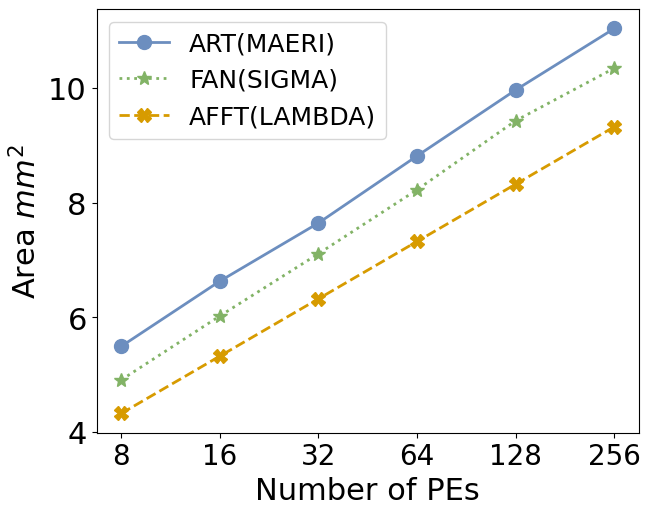

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# cycle_value = [[460992,  50176,  451584,  200704,  802816,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  262144,  200704,  451584,  200704,  200704,  451584,  200704,  21168,  7056,  12544,  50176,  7056,  18816,  21168,  8064,  21168,  21168,  5600,  8,  8,  8820,  14700,  9408,  15,  15,  14700,  14700,  9408,  15,  15,  14700,  29400,  1680,  14700,  12544,  1400,  12544,  11270,  1288,  11270,  11270,  1288,  11270,  30720,  3360,  225,  240,  41160,  57624,  4704,  441,  441,  65856,  57624,  3360,  441,  441,  20580,  29400,  4800,  900,  900,  29400,  29400,  4800,  900,  900,  29400,  29400],
# [3687936,  50176,  3612672,  802816,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  451584,  401408,  200704,  6021120,  451584,  401408,  6021120,  451584,  401408,  6021120,  451584,  401408,  12042240,  451584,  200704,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  262144,  200704,  451584,  200704,  200704,  451584,  200704,  1058400,  373968,  163072,  551936,  455112,  18816,  931392,  145152,  931392,  931392,  39200,  12,  8,  35280,  235200,  117600,  15,  15,  441000,  235200,  117600,  15,  15,  441000,  235200,  75600,  14700,  12544,  63000,  12544,  90160,  57960,  22540,  90160,  57960,  22540,  1397760,  35280,  225,  480,  41160,  57624,  211680,  441,  441,  1843968,  57624,  129360,  441,  441,  20580,  29400,  184800,  900,  900,  29400,  29400,  184800,  900,  900,  29400,  29400],
# [460992,  802816,  28901376,  25690112,  12845056,  12845056,  28901376,  25690112,  12845056,  28901376,  25690112,  3211264,  3612672,  12845056,  3211264,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  25690112,  7225344,  3211264,  1605632,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  6422528,  7225344,  6422528,  4194304,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  42336,  373968,  200704,  401408,  21168,  301056,  169344,  16128,  338688,  169344,  5600,  288,  96,  70560,  470400,  23520,  60,  240,  117600,  470400,  23520,  60,  240,  117600,  470400,  8400,  117600,  62720,  7000,  313600,  180320,  6440,  45080,  180320,  6440,  45080,  107520,  11760,  3600,  14400,  658560,  230496,  23520,  7056,  1764,  4214784,  230496,  18480,  7056,  1764,  164640,  470400,  26400,  7200,  7200,  235200,  470400,  26400,  7200,  7200,  235200,  470400],
# [3687936,  802816,  7225344,  3211264,  12845056,  12845056,  7225344,  3211264,  12845056,  7225344,  3211264,  3211264,  1806336,  12845056,  3211264,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  385351680,  7225344,  3211264,  1605632,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  144506888,  3211264,  3211264,  14450688,  3211264,  3211264,  7225344,  6422528,  2097152,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  529200,  14112,  1304576,  8830976,  151704,  301056,  931392,  36288,  1862784,  931392,  39200,  288,  96,  35280,  235200,  23520,  60,  240,  441000,  235200,  23520,  60,  240,  441000,  470400,  7560,  117600,  62720,  6300,  156800,  721280,  5796,  45080,  721280,  5796,  45080,  199680,  5040,  3600,  14400,  1317120,  230496,  21168,  7056,  1764,  3687936,  230496,  11760,  7056,  1764,  164640,  470400,  16800,  7200,  7200,  235200,  470400,  16800,  7200,  7200,  235200,  470400],
# [691488,  200704,  7225344,  6422528,  3211264,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  802816,  903168,  3211264,  802816,  6422528,  903168,  3211264,  6422528,  903168,  3211264,  6422528,  903168,  3211264,  12845056,  1806336,  802816,  401408,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  1605632,  1806336,  1605632,  1048576,  802816,  1806336,  1605632,  802816,  1806336,  1605632,  148176,  373968,  100352,  301056,  42336,  75264,  127008,  32256,  254016,  127008,  5600,  72,  24,  17640,  117600,  23520,  15,  60,  58800,  117600,  23520,  15,  60,  58800,  117600,  16800,  29400,  18816,  14000,  87808,  45080,  12880,  11270,  45080,  12880,  11270,  215040,  11760,  900,  3600,  164640,  57624,  47040,  1764,  441,  1053696,  57624,  18480,  1764,  441,  41160,  117600,  26400,  1800,  1800,  58800,  117600,  26400,  1800,  1800,  58800,  117600],
# [3687936,  200704,  1806336,  802816,  3211264,  3211264,  1806336,  802816,  3211264,  1806336,  802816,  802816,  451584,  3211264,  802816,  24084480,  451584,  3211264,  24084480,  451584,  3211264,  24084480,  451584,  3211264,  96337920,  1806336,  802816,  401408,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  1806336,  1605632,  524288,  802816,  1806336,  1605632,  802816,  1806336,  1605632,  529200,  52920,  326144,  2207744,  151704,  75264,  232848,  36288,  465696,  232848,  39200,  72,  24,  8820,  58800,  23520,  15,  60,  110250,  58800,  23520,  15,  60,  110250,  117600,  15120,  29400,  18816,  12600,  43904,  180320,  11592,  11270,  180320,  11592,  11270,  199680,  5040,  900,  3600,  329280,  57624,  42336,  1764,  441,  921984,  57624,  23520,  1764,  441,  41160,  117600,  33600,  1800,  1800,  58800,  117600,  33600,  1800,  1800,  58800,  117600],
# [1152480,  802816,  3612672,  3211264,  12845056,  12845056,  3612672,  3211264,  12845056,  3612672,  3211264,  3211264,  1806336,  12845056,  3211264,  25690112,  1806336,  12845056,  25690112,  1806336,  12845056,  25690112,  1806336,  12845056,  102760448,  7225344,  3211264,  1605632,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  3211264,  7225344,  6422528,  2097152,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  84672,  52920,  401408,  2408448,  14112,  301056,  254016,  52096,  508032,  254016,  14000,  288,  96,  17640,  58800,  9408,  60,  240,  117600,  58800,  9408,  60,  240,  117600,  117600,  5040,  117600,  62720,  4200,  156800,  180320,  3864,  22540,  180320,  3864,  22540,  61440,  3360,  3600,  14400,  658560,  230496,  14112,  7056,  1764,  1053696,  230496,  6720,  7056,  1764,  164640,  470400,  9600,  7200,  7200,  235200,  470400,  9600,  7200,  7200,  235200,  470400],
# [1152480,  200704,  6322176,  3211264,  3211264,  3211264,  6322176,  3211264,  3211264,  6322176,  3211264,  802816,  451584,  3211264,  802816,  6422528,  451584,  3211264,  6422528,  451584,  3211264,  6422528,  451584,  3211264,  25690112,  1806336,  802816,  401408,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  802816,  1806336,  1605632,  524288,  802816,  1806336,  1605632,  802816,  1806336,  1605632,  84672,  56448,  100352,  602112,  28224,  75264,  127008,  36288,  254016,  127008,  14000,  72,  24,  8820,  58800,  37632,  15,  60,  58800,  58800,  37632,  15,  60,  58800,  58800,  7560,  29400,  18816,  6300,  43904,  45080,  5796,  11270,  45080,  5796,  11270,  245760,  10080,  900,  3600,  164640,  57624,  21168,  1764,  441,  1053696,  57624,  23520,  1764,  441,  41160,  117600,  33600,  1800,  1800,  58800,  117600,  33600,  1800,  1800,  58800,  117600],
# [460992,  802816,  28901376,  25690112,  12845056,  12845056,  28901376,  25690112,  12845056,  28901376,  25690112,  3211264,  3612672,  12845056,  3211264,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  25690112,  7225344,  3211264,  1605632,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  6422528,  7225344,  6422528,  4194304,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  127008,  373968,  200704,  401408,  42336,  301056,  169344,  16128,  338688,  169344,  5600,  288,  96,  70560,  470400,  23520,  60,  240,  117600,  470400,  23520,  60,  240,  117600,  470400,  8400,  117600,  62720,  7000,  313600,  180320,  6440,  45080,  180320,  6440,  45080,  107520,  11760,  3600,  14400,  658560,  230496,  23520,  7056,  1764,  4214784,  230496,  18480,  7056,  1764,  164640,  470400,  26400,  7200,  7200,  235200,  470400,  26400,  7200,  7200,  235200,  470400],
# [3687936,  802816,  7225344,  3211264,  12845056,  12845056,  7225344,  3211264,  12845056,  7225344,  3211264,  3211264,  1806336,  12845056,  3211264,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  385351680,  7225344,  3211264,  1605632,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  7225344,  6422528,  2097152,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  529200,  42336,  1304576,  8830976,  151704,  301056,  931392,  36288,  1862784,  931392,  39200,  288,  96,  35280,  235200,  23520,  60,  240,  441000,  235200,  23520,  60,  240,  441000,  470400,  7560,  117600,  62720,  6300,  156800,  721280,  5796,  45080,  721280,  5796,  45080,  199680,  5040,  3600,  14400,  1317120,  230496,  21168,  7056,  1764,  3687936,  230496,  23520,  7056,  1764,  164640,  470400,  33600,  7200,  7200,  235200,  470400,  33600,  7200,  7200,  235200,  470400]]

area_overhead = [
[45, 99, 200, 450, 999, 2100],
[30, 65, 138, 299, 689, 1300],
[20, 40, 80, 160, 320, 640]
]

area_overhead= np.log2(area_overhead)
max_range = np.max(area_overhead)

color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656", "#23445D", "#56517E"]
shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
linestyle_list = ["solid", "dotted", "dashed", "dashdot"]

x = [i for i in range(len(area_overhead[0]))]
# x = [2**(3+i) for i in range(len(area_overhead[0]))]
# create data
fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)

barWidth = 0.5
plt_handler = []
# plt_handler.append(plt.bar(x, area_overhead[0], width=barWidth, color="#666666"))

for case_id in range(len(area_overhead)):
    plt_handler.append(plt.plot(x, area_overhead[case_id], marker=shape_list[case_id], markersize=10, color=color_list[case_id], linewidth=2, linestyle=linestyle_list[case_id])[0])

# for case_id in range(len(area_overhead)-1):
#     plt_handler.append(plt.plot(x, area_overhead[case_id+1], marker=shape_list[case_id], markersize=10, color=color_list[case_id], linewidth=2)[0])

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel(r"Area $mm^2$", fontsize=BIGGER_SIZE)
plt.xlabel(r"Number of PEs", fontsize=BIGGER_SIZE)
# plt.xlabel(r"$Log_2(N)$ for $N\times N$ PEs", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.xticks(x,["8","16","32","64","128","256"], fontsize=MEDIUM_SIZE)
# plt.ylim([15, max_range*1.18])

# plt.legend(plt_handler, ["no layout constraints", "CSWTHT", "CTWSHT", "CTWTHS", "CSWSHT", "CSWTHS", "CTWSHS", "CSWSHS", "CTWSHTD", "CTWTHSD"], loc='upper center', ncol=5, fontsize=SMALL_SIZE)
# plt.legend(plt_handler, ["no layout constraints", "CX32", "WX32", "HX32", "CX4WX8", "CX4HX8", "WX4HX8", "WX4HX8", "WX32D", "HX32D"], loc='upper center', ncol=5, fontsize=SMALL_SIZE)
plt.legend(plt_handler, ["ART(MAERI)", "FAN(SIGMA)", "AFFT(LAMBDA)"], loc='best', ncol=1, fontsize=SMALL_SIZE)
# plt.legend(plt_handler, ["Global Optimal", "CWH_CX32", "HWC_WX32", "HWC_HX32", "CWH_CX4WX8", "CHW_CX4HX8", "WHC_WX4HX8", "WHC_WX4HX8", "WHC_WX32D", "HWC_HX32D"], loc='upper center', ncol=5, fontsize=SMALL_SIZE)
# plt.ylim([15, max_range*1.18])

# print(f"latency saving ratio range is [{1-np.max(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))},  {1-np.min(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))}]")
plt.savefig('scalable_reduction_noc_comparison.pdf', bbox_inches="tight", transparent=True) 
plt.show()

# LAMBDA v.s. SIGMA

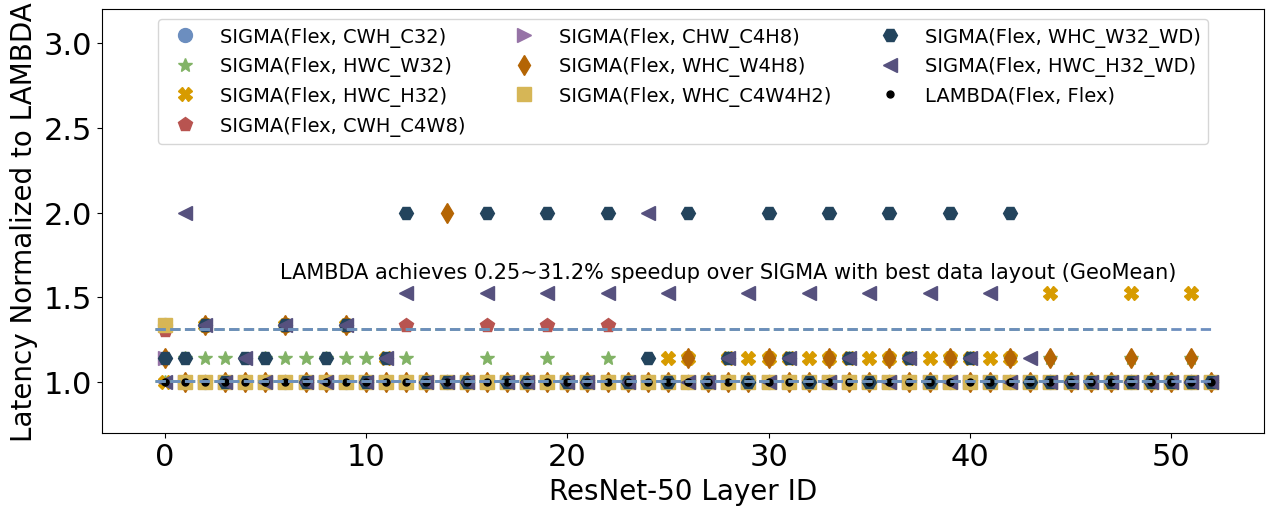

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# last row is LAMBDA
original_value = [[614656,50176,451584,200704,802816,200704,451584,200704,200704,451584,200704,401408,451584,200704,200704,200704,451584,200704,200704,451584,200704,200704,451584,200704,401408,451584,200704,200704,200704,451584,200704,200704,451584,200704,200704,451584,200704,200704,451584,200704,200704,451584,200704,401408,451584,200704,262144,200704,451584,200704,200704,451584,200704],
[460992,57344,516096,229376,802816,229376,516096,229376,229376,516096,229376,401408,516096,200704,200704,200704,516096,200704,200704,516096,200704,200704,516096,200704,401408,451584,229376,200704,229376,451584,229376,229376,451584,229376,229376,451584,229376,229376,451584,229376,229376,451584,229376,401408,516096,200704,262144,200704,516096,200704,200704,516096,200704],
[460992,50176,602112,200704,802816,200704,602112,200704,200704,602112,200704,458752,451584,200704,200704,200704,451584,200704,200704,451584,200704,200704,451584,200704,401408,516096,229376,200704,229376,516096,229376,229376,516096,229376,229376,516096,229376,229376,516096,229376,229376,516096,229376,401408,688128,200704,262144,200704,688128,200704,200704,688128,200704],
[602112,50176,451584,200704,802816,200704,451584,200704,200704,451584,200704,401408,602112,200704,200704,200704,602112,200704,200704,602112,200704,200704,602112,200704,401408,451584,200704,200704,200704,451584,200704,200704,451584,200704,200704,451584,200704,200704,451584,200704,200704,451584,200704,401408,451584,200704,262144,200704,451584,200704,200704,451584,200704],
[526848,50176,451584,200704,802816,200704,451584,200704,200704,451584,200704,401408,451584,200704,200704,200704,451584,200704,200704,451584,200704,200704,451584,200704,401408,451584,200704,200704,200704,451584,200704,200704,451584,200704,200704,451584,200704,200704,451584,200704,200704,451584,200704,401408,451584,200704,262144,200704,451584,200704,200704,451584,200704],
[526848,50176,602112,200704,802816,200704,602112,200704,200704,602112,200704,401408,451584,200704,401408,200704,451584,200704,200704,451584,200704,200704,451584,200704,401408,451584,229376,200704,200704,451584,229376,200704,451584,229376,200704,451584,229376,200704,451584,229376,200704,451584,229376,401408,516096,200704,262144,200704,516096,200704,200704,516096,200704],
[614656,50176,451584,200704,802816,200704,451584,200704,200704,451584,200704,401408,451584,200704,200704,200704,451584,200704,200704,451584,200704,200704,451584,200704,401408,451584,200704,200704,200704,451584,200704,200704,451584,200704,200704,451584,200704,200704,451584,200704,200704,451584,200704,401408,451584,200704,262144,200704,451584,200704,200704,451584,200704],
[526848,57344,602112,200704,917504,229376,602112,200704,229376,602112,200704,458752,903168,200704,200704,200704,903168,200704,200704,903168,200704,200704,903168,200704,458752,451584,401408,200704,229376,451584,401408,229376,451584,401408,229376,451584,401408,229376,451584,401408,229376,451584,401408,401408,451584,200704,262144,200704,451584,200704,200704,451584,200704],
[460992,100352,602112,200704,917504,200704,602112,200704,200704,602112,200704,458752,688128,200704,200704,200704,688128,200704,200704,688128,200704,200704,688128,200704,802816,688128,200704,200704,229376,688128,200704,229376,688128,200704,229376,688128,200704,229376,688128,200704,229376,688128,200704,458752,451584,200704,262144,200704,451584,200704,200704,451584,200704],
[460992,50176,451584,200704,802816,200704,451584,200704,200704,451584,200704,401408,451584,200704,200704,200704,451584,200704,200704,451584,200704,200704,451584,200704,401408,451584,200704,200704,200704,451584,200704,200704,451584,200704,200704,451584,200704,200704,451584,200704,200704,451584,200704,401408,451584,200704,262144,200704,451584,200704,200704,451584,200704]]
num_entries = len(original_value)
latency = []
new_worst_latency = []

original_value = np.asarray(original_value, dtype = np.float64)
for row_id in range(num_entries):
    original_value[row_id,:] = original_value[row_id,:] / original_value[-1,:]

cycle_value = original_value
max_range = np.max(cycle_value)

overall_latency = np.sum(cycle_value, 1)
latency.append(cycle_value[np.argmax(overall_latency[:-1])])
latency.append(cycle_value[-1])

new_worst_latency.append(cycle_value[np.argmin(overall_latency[:-1])])
new_worst_latency.append(cycle_value[-1])


color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656", "#23445D", "#56517E", "#000000"]
shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<", "."]

x = [i for i in range(len(cycle_value[0]))]
# create data
fig = plt.figure(figsize=[15,5.5])
ax = plt.subplot(111)

barWidth = 0.4
plt_handler = []

for case_id in range(len(cycle_value)):
    plt_handler.append(plt.plot(x, cycle_value[case_id], marker=shape_list[case_id], markersize=10, color=color_list[case_id],  linewidth=0)[0])
# plt_handler.append(plt.bar(x, cycle_value[0], width=barWidth, color="#666666"))

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel(r"Latency Normalized to LAMBDA", fontsize=MEDIUM_SIZE)

plt.xlabel("ResNet-50 Layer ID", fontsize=MEDIUM_SIZE)
# plt.xticks(x, ["w/wo", "w/wo" "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
# plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

geomean= [np.prod(latency[0])**(1/len(latency[0])), np.prod(latency[1])**(1/len(latency[1]))]
geomean_speedup = geomean[0]/geomean[1]

geomean= [np.prod(new_latency[0])**(1/len(new_latency[0])), np.prod(new_latency[1])**(1/len(new_latency[1]))]
geomean_speedup = geomean[0]/geomean[1]

geomean_worst = [np.prod(new_worst_latency[0])**(1/len(new_worst_latency[0])), np.prod(new_worst_latency[1])**(1/len(new_worst_latency[1]))]
geomean_worst_speedup = geomean_worst[0]/geomean_worst[1]

# plt.plot([-0.5, 20.5], [geomean[0], geomean[0]], linewidth=2, color=color_list[0], linestyle="--")
plt.plot([-0.5, 50], [geomean_speedup, geomean_speedup], linewidth=2, color=color_list[1], linestyle="--")
plt.plot([-0.5, 50], [geomean_worst_speedup, geomean_worst_speedup], linewidth=2, color=color_list[1], linestyle="--")
# plt_handler.append(plt.plot([-0.5, 20.5], [geomean[0], geomean[0]], linewidth=2, color=color_list[0], linestyle="--")[0])#, marker = 'o'))
plt_handler.append(plt.plot([-0.5, 52], [geomean_speedup, geomean_speedup], linewidth=2, color=color_list[0], linestyle="--")[0])#, marker = 'o'))
plt_handler.append(plt.plot([-0.5, 52], [geomean_worst_speedup, geomean_worst_speedup], linewidth=2, color=color_list[0], linestyle="--")[0])#, marker = 'o'))
# ax.arrow(5, 2.05, 0, geomean_speedup-1.9, head_width = 0.3, width = 0.01)
# plt.text(8, 1.2, 'LMABDA speedup ??% over Xilinx DPU (GeoMean)', horizontalalignment='center')
plt.text(28, geomean_speedup*1.23, f'LAMBDA achieves {(geomean_worst_speedup-1)*100:0.2f}~{(geomean_speedup-1)*100:0.1f}% speedup over SIGMA with best data layout (GeoMean)', fontsize= 15, color="k", horizontalalignment='center')
# plt.text(32, geomean_speedup*1.2, f'LMABDA speedup {(geomean_speedup-1)*100:0.0f}% over SIGMA with best data layout (GeoMean)', fontsize= 15, color=color_list[0], horizontalalignment='center')

# plt.legend(plt_handler, ["no layout constraints", "CSWTHT", "CTWSHT", "CTWTHS", "CSWSHT", "CSWTHS", "CTWSHS", "CSWSHS", "CTWSHTD", "CTWTHSD"], loc='upper center', ncol=5, fontsize=SMALL_SIZE)
# plt.legend(plt_handler, ["no layout constraints", "CX32", "WX32", "HX32", "CX4WX8", "CX4HX8", "WX4HX8", "WX4HX8", "WX32D", "HX32D"], loc='upper center', ncol=5, fontsize=SMALL_SIZE)
# plt.legend(plt_handler, ["CWH_C32", "HWC_W32", "HWC_H32", "CWH_C4W8", "CHW_C4H8", "WHC_W4H8", "WHC_C4W4H2", "WHC_W32_WD", "HWC_H32_WD", "Adaptive"], loc='upper center', ncol=5, fontsize=15)
plt.legend(plt_handler, ["SIGMA(Flex, CWH_C32)", "SIGMA(Flex, HWC_W32)", "SIGMA(Flex, HWC_H32)", "SIGMA(Flex, CWH_C4W8)", "SIGMA(Flex, CHW_C4H8)", "SIGMA(Flex, WHC_W4H8)", "SIGMA(Flex, WHC_C4W4H2)", "SIGMA(Flex, WHC_W32_WD)", "SIGMA(Flex, HWC_H32_WD)", "LAMBDA(Flex, Flex)"], loc='upper center', ncol=3, fontsize=14)
# plt.legend(plt_handler, ["SIGMA(Flex, CWH_C32)", "SIGMA(Flex, HWC_W32)", "SIGMA(Flex, HWC_H32)", "SIGMA(Flex, CWH_C4W8)", "SIGMA(Flex, CHW_C4H8)", "SIGMA(Flex, WHC_W4H8)", "SIGMA(Flex, WHC_C4W4H2)", "SIGMA(Flex, WHC_W32_WD)", "SIGMA(Flex, HWC_H32_WD)", "LAMBDA(Flex, Flex)"], loc='best', bbox_to_anchor=(1.8, 0.5), ncol=5, fontsize=15)
# plt.legend(plt_handler, ["Global Optimal", "CWH_CX32", "HWC_WX32", "HWC_HX32", "CWH_CX4WX8", "CHW_CX4HX8", "WHC_WX4HX8", "WHC_WX4HX8", "WHC_WX32D", "HWC_HX32D"], loc='upper center', ncol=5, fontsize=SMALL_SIZE)
plt.ylim([0.7, max_range*1.6])

# print(f"latency saving ratio range is [{1-np.max(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))},  {1-np.min(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))}]")

plt.savefig('ResNet50_global_vs_layout.pdf', bbox_inches="tight", transparent=True) 
plt.show()

In [22]:
overall_latency

array([53.33333333, 56.85714286, 58.14285714, 54.63945578, 53.14285714,
       56.42857143, 53.33333333, 65.71428571, 62.38095238, 53.        ])

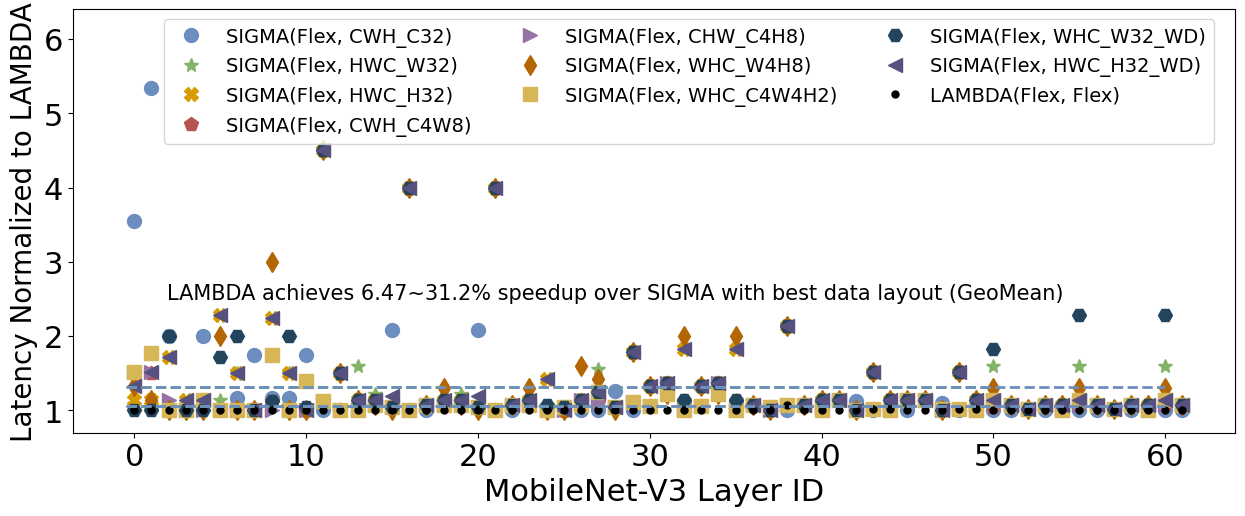

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# last row is LAMBDA
original_value = [[75264,37632,25088,50176,14112,18816,25088,14112,25088,25088,9800,8,8,9408,15680,19600,15,15,15680,15680,19600,15,15,15680,31360,1764,14700,12544,1764,12544,12544,1764,12544,12544,1764,12544,31360,3528,225,240,41160,65856,5292,441,441,57624,65856,3675,441,441,20580,29400,4900,900,900,29400,29400,4900,900,900,29400,29400],
[21168,7056,12544,50176,8064,21504,32256,8064,24192,32256,5600,36,12,14112,17920,9800,60,16,16800,17920,9800,60,16,16800,31360,1680,16800,19600,1470,22400,15680,1764,12880,15680,1764,12880,31360,3360,480,240,47040,65856,4704,672,504,65856,65856,3360,672,504,32928,31360,4900,960,960,47040,31360,4900,960,960,47040,31360],
[24192,8064,21504,57344,8064,43008,32256,8064,48384,32256,5600,36,12,10080,16800,9800,60,16,16800,16800,9800,60,16,16800,44800,1680,16800,15680,1470,22400,15680,1764,20608,15680,1764,20608,31360,3360,480,240,47040,65856,4704,672,504,65856,65856,3360,672,504,23520,31360,4900,960,960,33600,31360,4900,960,960,33600,31360],
[31752,10584,12544,50176,8064,18816,21504,8064,24192,21504,5600,9,8,9408,15680,9800,15,16,15680,15680,9800,15,16,15680,31360,1680,16800,14000,1470,14000,12544,1764,11270,12544,1764,11270,31360,3360,240,240,41160,65856,4704,448,441,65856,65856,3360,448,441,21504,31360,4900,960,900,31360,31360,4900,960,900,31360,31360],
[32256,10752,14336,50176,7056,18816,21504,8064,21504,21504,5600,9,8,8820,15680,9800,15,16,15680,15680,9800,15,16,15680,31360,1680,16800,14000,1470,14000,12544,1764,11270,12544,1764,11270,31360,3360,240,240,43008,65856,4704,448,441,65856,65856,3360,448,441,23520,31360,4900,960,900,31360,31360,4900,960,900,31360,31360],
[28224,8064,12544,50176,7056,37632,21504,8064,64512,21504,5600,36,12,10080,15680,9408,60,16,19200,15680,9408,60,16,19200,31360,1680,23520,17920,1400,22400,15680,1568,22540,15680,1568,22540,31360,3360,480,240,47040,65856,4704,672,504,65856,65856,3360,672,504,26880,31360,4900,960,960,38400,31360,4900,960,960,38400,31360],
[32256,12544,12544,50176,8064,18816,21504,8064,37632,21504,7840,9,8,8820,15680,9800,15,16,15680,15680,9800,15,16,15680,31360,1764,15680,15680,1470,14000,12544,1568,11270,12544,1568,11270,31360,3528,240,240,41160,65856,4704,448,441,65856,65856,3430,448,441,23520,31360,4900,960,900,33600,31360,4900,960,900,33600,31360],
[21168,7056,25088,50176,7056,32256,43008,8064,24192,43008,5880,36,12,10080,16800,9800,60,16,16800,16800,9800,60,16,16800,33600,1764,16800,15680,1470,22400,15680,1764,12880,15680,1764,12880,31360,3360,480,240,47040,65856,4704,672,504,65856,65856,3360,672,504,37632,31360,4900,960,960,67200,31360,4900,960,960,67200,31360],
[28224,10752,21504,57344,8064,43008,32256,8064,48384,32256,5600,36,12,10080,16800,11200,60,16,16800,16800,11200,60,16,16800,44800,1680,16800,15680,1470,22400,15680,1764,20608,15680,1764,20608,31360,3360,480,240,47040,65856,4704,672,504,65856,65856,3360,672,504,23520,31360,4900,960,960,33600,31360,4900,960,960,33600,31360],
[21168,7056,12544,50176,7056,18816,21504,8064,21504,21504,5600,8,8,8820,14700,9408,15,15,14700,14700,9408,15,15,14700,31360,1680,14700,12544,1400,12544,11776,1288,11270,11776,1288,11270,29400,3360,240,225,41160,57624,4704,448,448,57624,57624,3360,448,448,20580,29400,4800,900,900,29400,29400,4800,900,900,29400,29400]]

new_latency = []
new_worst_latency = []

num_entries = len(original_value)
original_value = np.asarray(original_value, dtype = np.float64)
best = np.min(original_value,0)
for row_id in range(num_entries):
    original_value[row_id,:] = original_value[row_id,:] / best

cycle_value = original_value
max_range = np.max(cycle_value)

overall_latency = np.sum(cycle_value, 1)
new_latency.append(cycle_value[np.argmax(overall_latency[:-1])])
new_latency.append(cycle_value[-1])

new_worst_latency.append(cycle_value[np.argmin(overall_latency[:-1])])
new_worst_latency.append(cycle_value[-1])

color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656", "#23445D", "#56517E", "#000000"]
shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<", "."]

x = [i for i in range(len(cycle_value[0]))]
# create data
fig = plt.figure(figsize=[15,5.5])
ax = plt.subplot(111)

barWidth = 0.4
plt_handler = []

for case_id in range(len(cycle_value)):
    plt_handler.append(plt.plot(x, cycle_value[case_id], marker=shape_list[case_id], markersize=10, color=color_list[case_id],  linewidth=0)[0])
# plt_handler.append(plt.bar(x, cycle_value[0], width=barWidth, color="#666666"))

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel(r"Latency Normalized to LAMBDA", fontsize=MEDIUM_SIZE)

plt.xlabel("MobileNet-V3 Layer ID", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["w/wo", "w/wo" "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
# plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize


geomean= [np.prod(new_latency[0])**(1/len(new_latency[0])), np.prod(new_latency[1])**(1/len(new_latency[1]))]
geomean_speedup = geomean[0]/geomean[1]

geomean_worst = [np.prod(new_worst_latency[0])**(1/len(new_worst_latency[0])), np.prod(new_worst_latency[1])**(1/len(new_worst_latency[1]))]
geomean_worst_speedup = geomean_worst[0]/geomean_worst[1]

# plt.plot([-0.5, 20.5], [geomean[0], geomean[0]], linewidth=2, color=color_list[0], linestyle="--")
plt.plot([-0.5, 50], [geomean_speedup, geomean_speedup], linewidth=2, color=color_list[1], linestyle="--")
plt.plot([-0.5, 50], [geomean_worst_speedup, geomean_worst_speedup], linewidth=2, color=color_list[1], linestyle="--")
# plt_handler.append(plt.plot([-0.5, 20.5], [geomean[0], geomean[0]], linewidth=2, color=color_list[0], linestyle="--")[0])#, marker = 'o'))
plt_handler.append(plt.plot([-0.5, 60], [geomean_speedup, geomean_speedup], linewidth=2, color=color_list[0], linestyle="--")[0])#, marker = 'o'))
plt_handler.append(plt.plot([-0.5, 60], [geomean_worst_speedup, geomean_worst_speedup], linewidth=2, color=color_list[0], linestyle="--")[0])#, marker = 'o'))
# ax.arrow(5, 2.05, 0, geomean_speedup-1.9, head_width = 0.3, width = 0.01)
# plt.text(8, 1.2, 'LMABDA speedup ??% over Xilinx DPU (GeoMean)', horizontalalignment='center')
# plt.text(32, geomean_speedup*1.8, f'LMABDA speedup {(geomean_worst_speedup-1)*100:0.1f}~{(geomean_speedup-1)*100:0.1f}% over SIGMA with best data layout (GeoMean)', fontsize= 15, color=color_list[0], horizontalalignment='center')
plt.text(28, geomean_speedup*1.9, f'LAMBDA achieves {(geomean_worst_speedup-1)*100:0.2f}~{(geomean_speedup-1)*100:0.1f}% speedup over SIGMA with best data layout (GeoMean)', fontsize= 15, color="k", horizontalalignment='center')
# plt.text(32, geomean_speedup*1.2, f'LMABDA speedup {(geomean_speedup-1)*100:0.0f}% over SIGMA with best data layout (GeoMean)', fontsize= 15, color=color_list[0], horizontalalignment='center')

plt.legend(plt_handler, ["SIGMA(Flex, CWH_C32)", "SIGMA(Flex, HWC_W32)", "SIGMA(Flex, HWC_H32)", "SIGMA(Flex, CWH_C4W8)", "SIGMA(Flex, CHW_C4H8)", "SIGMA(Flex, WHC_W4H8)", "SIGMA(Flex, WHC_C4W4H2)", "SIGMA(Flex, WHC_W32_WD)", "SIGMA(Flex, HWC_H32_WD)", "LAMBDA(Flex, Flex)"], loc='upper center', bbox_to_anchor=(0.53, 1), ncol=3, fontsize=14)

plt.ylim([0.7, max_range*1.2])

# print(f"latency saving ratio range is [{1-np.max(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))},  {1-np.min(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))}]")

plt.savefig('MobV3_global_vs_layout.pdf', bbox_inches="tight", transparent=True) 
plt.show()

In [18]:
overall_latency

array([72, 72, 74, 62, 62, 77, 62, 77, 74, 62])

# Performance of Convolution-diff-size

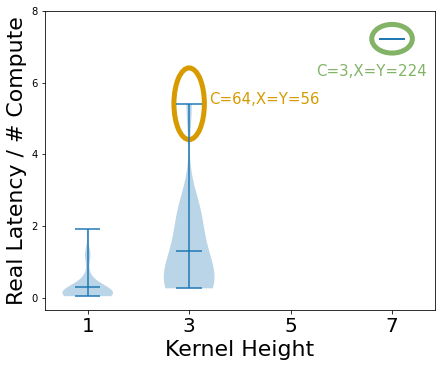

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from matplotlib.patches import Ellipse

def unique(list1):
    # insert the list to the set
    list_set = set(list1)
    # convert the set to the list
    unique_list = (list(list_set))
    return unique_list

ratio_dpu_latency_roofline_latency = np.array([7.22432175,1.899098481,5.409227717,1.171800252,0.1189388855,1.172061864,1.903221389,1.231768296,0.2490153384,2.426366369,0.602694241,0.1246296518,2.328204694,0.2409279799,0.5437382141,0.2408633528,2.474030111,0.1360562979,0.3080405997,1.22988531,0.1370598783,0.3062101902,0.5488139759,0.307718113,0.06851008385,1.14928973,0.1282657952,0.2526265419,0.1281502692,1.257706996,0.07346336331,0.1710885651,0.6225197767,0.07338939107,0.1554970367,0.2942596137,0.07346069556,0.07349283091,0.2910787265,0.07275060255,0.07274554969,0.290877263,0.07336061062,0.03653203752,0.2581964511,0.06456090778,0.05100238565,0.06401453584,0.2582287097,0.06454676792,0.06448985353,0.2566636682,0.06453952044])
conv_size = np.array([7,1,3,1,1,1,3,1,1,3,1,1,3,1,1,1,3,1,1,3,1,1,3,1,1,3,1,1,1,3,1,1,3,1,1,3,1,1,3,1,1,3,1,1,3,1,1,1,3,1,1,3,1])
# groups = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16,1,1,64,1,1,72,1,1,72,1,1,1,1,120,1,1,1,1,120,1,1,1,1,240,1,1,200,1,1,184,1,1,184,1,1,480,1,1,1,1,672,1,1,1,1,672,1,1,1,1,960,1,1,1,1,960,1,1,1,1])

# non_group_conv = np.where(groups == 1)[0]
# ratio_dpu_latency_roofline_latency = ratio_dpu_latency_roofline_latency[non_group_conv]
# conv_size = conv_size[non_group_conv]

pos = unique(conv_size)
# pos.remove(max(pos))
data = []
for i in range(len(pos)):
    data.append(ratio_dpu_latency_roofline_latency[np.where(conv_size == pos[i])])

# Fixing random state for reproducibility
np.random.seed(19680801)
fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)
ax.violinplot(data, pos, points=60, widths=1, showmeans=True,
                      showextrema=True, showmedians=False, bw_method=0.5)
                    #   quantiles=[[0.1], [], [], [0.175, 0.954], [0.75], [0.25]])
color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656","#23445D"]
circle1 = Ellipse(xy=(3, 5.409227717),width=2, height=0.6,angle=90, lw=5, color=color_list[2], fill=False)
ax.text(3.4, 5.409227717, 'C=64,X=Y=56',color=color_list[2],fontsize=15)
circle2 = plt.Circle((7, 7.22432175), 0.4,lw=5, color=color_list[1], fill=False)
ax.text(5.5, 6.2, 'C=3,X=Y=224', color=color_list[1],fontsize=15)
ax.add_patch(circle1)
ax.add_patch(circle2)
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Real Latency / # Compute", fontsize=BIGGER_SIZE)
plt.xlabel("Kernel Height", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["w/wo", "w/wo", "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
plt.xticks([1, 3, 5, 7], ["1", "3", "5", "7"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize



# plt.legend(plt_handler, ["Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
# plt.legend(plt_handler, ["CPU", "FastSwitch W/O PB", "FastSwitch W/ PB"], loc='upper left', fontsize=SMALL_SIZE)
plt.savefig('convolution_performance.pdf', bbox_inches="tight", transparent=True) 
plt.show()

# group convolution

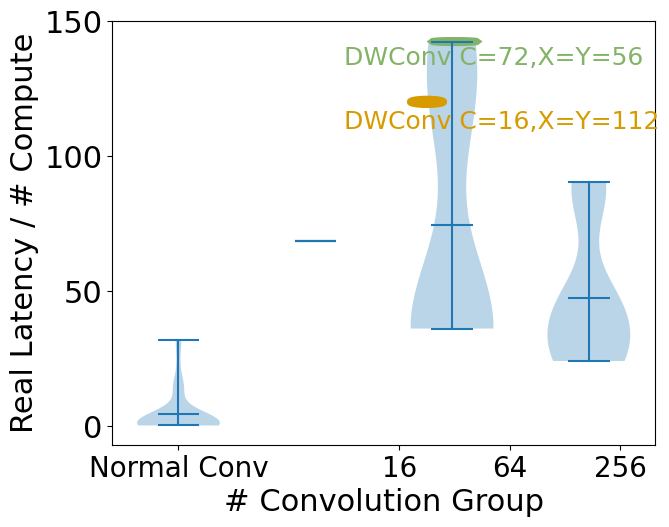

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Ellipse
import csv

def unique(list1):
    # insert the list to the set
    list_set = set(list1)
    # convert the set to the list
    unique_list = (list(list_set))
    return unique_list

ratio_dpu_latency_roofline_latency = np.array([22.89342645,68.71469354,5.442458325,1.914607282,120.1482599,3.258257873,1.535821134,37.00045822,3.22175461,1.540886965,142.5149891,31.85123264,31.35866609,1.967630512,0.9014015383,36.1059565,13.84907682,15.28471094,1.913355165,0.9033930861,36.08923038,13.97930729,14.41454492,1.896614244,0.6047071938,90.38170185,0.9024032847,0.5132688417,41.25091756,0.9174837,0.5450276087,44.02278116,0.9402208001,0.5457913829,43.99640556,0.9246739221,0.3012159352,24.05892917,1.213585764,1.24728928,0.6396877307,0.2163302544,24.67849901,0.7141195658,0.7486957022,0.6319717055,0.2170180113,86.00581031,0.7187445082,0.7517737121,0.4120243138,0.1573481618,25.53263525,0.4374810221])
conv_size = np.array([3,3,1,1,3,1,1,3,1,1,5,1,1,1,1,5,1,1,1,1,5,1,1,1,1,3,1,1,3,1,1,3,1,1,3,1,1,3,1,1,1,1,3,1,1,1,1,5,1,1,1,1,5,1,1,1,1,5,1,1,1,1])
groups = np.array([1,16,1,1,64,1,1,72,1,1,72,1,1,1,1,120,1,1,1,1,120,1,1,1,1,240,1,1,200,1,1,184,1,1,184,1,1,480,1,1,1,1,672,1,1,1,1,672,1,1,1,1,960,1])
log_groups = np.log2(groups)
max_groups = np.max(log_groups)
num_groups = 4
divider = max_groups/num_groups
non_group_conv = np.where(log_groups > 1)[0]

pos = np.array([i*divider for i in range(num_groups)])# unique(groups)
# pos.remove(max(pos))
data = []
for i in range(pos.size):
    temp = ratio_dpu_latency_roofline_latency[np.where(divider*i <= log_groups)]
    temp_groups = log_groups[np.where(divider*i <= log_groups)]
    data.append(temp[np.where(temp_groups <= divider*(i+1))])

# Fixing random state for reproducibility
np.random.seed(19680801)
fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)
ax.violinplot(data, pos, points=60, widths=1.5, showmeans=True,
                      showextrema=True, showmedians=False, bw_method=0.5)
                    #   quantiles=[[0.1], [], [], [0.175, 0.954], [0.75], [0.25]])

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Real Latency / # Compute", fontsize=BIGGER_SIZE)
plt.xlabel("# Convolution Group", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["w/wo", "w/wo", "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
# plt.xticks(divider, [ "1", "3", "5"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")
color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656","#23445D"]
circle1 = Ellipse(xy=(4.5, 120.1482599),width=2, height=0.6,angle=90, lw=5, color=color_list[2], fill=False)
ax.text(3, 110, 'DWConv C=16,X=Y=112',color=color_list[2],fontsize=18)
circle2 = plt.Circle((5, 142.5149891), 0.4,lw=5, color=color_list[1], fill=False)
ax.text(3, 134, 'DWConv C=72,X=Y=56', color=color_list[1],fontsize=18)
ax.add_patch(circle1)
ax.add_patch(circle2)
# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.xticks([0, 4, 6, 8], ["Normal Conv", "16", "64", "256"], fontsize=MEDIUM_SIZE)

# plt.legend(plt_handler, ["Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
# plt.legend(plt_handler, ["CPU", "FastSwitch W/O PB", "FastSwitch W/ PB"], loc='upper left', fontsize=SMALL_SIZE)
plt.savefig('group_conv_performance.pdf', bbox_inches="tight", transparent=True) 
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Ellipse
import csv


layout_considered_energy = [
    [3.571132075,15.98698113,14.94169811,5.047358491,4.000943396,8.792264151,4.023207547,14.10886792,11.4809434,2.71], # ResNet50, "no layout constraints", "CSWTHT", "CTWSHT", "CTWTHS", "CSWSHT", "CSWTHS", "CTWSHS", "CSWSHS", "CTWSHTD", "CTWTHSD"
[30.33096774,24.57677419,25.02677419,28.87016129,28.25177419,25.07806452,23.71435484,25.93048387,25.08483871,21.5966129]] # ResNet50, "no layout constraints", "CSWTHT", "CTWSHT", "CTWTHS", "CSWSHT", "CSWTHS", "CTWSHS", "CSWSHS", "CTWSHTD", "CTWTHSD"
num_data = len(layout_considered_energy[1])
for i in range(num_data-1,0,-1):
    layout_considered_energy[0][i] = layout_considered_energy[0][i] / layout_considered_energy[0][0]
    layout_considered_energy[1][i] = layout_considered_energy[1][i] / layout_considered_energy[1][0]
layout_considered_energy[0][0] = 1
layout_considered_energy[1][0] = 1

color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656","#23445D", "#56517E", "#AE4132"]
x = [1, 2]
num_column = len(layout_considered_energy[0])
barWidth = 4/num_column
plt_handler = []
for j in range(len(layout_considered_energy)):
    plt.bar(x[j]-barWidth*9/num_column, layout_considered_energy[j][0], width=barWidth*2/num_column, bottom=0, color=color_list[0])
    plt.bar(x[j]-barWidth*7/num_column, layout_considered_energy[j][1], width=barWidth*2/num_column, bottom=0, color=color_list[1])
    plt.bar(x[j]-barWidth*5/num_column, layout_considered_energy[j][2], width=barWidth*2/num_column, bottom=0, color=color_list[2])
    plt.bar(x[j]-barWidth*3/num_column, layout_considered_energy[j][3], width=barWidth*2/num_column, bottom=0, color=color_list[3])
    plt.bar(x[j]-barWidth*1/num_column, layout_considered_energy[j][4], width=barWidth*2/num_column, bottom=0, color=color_list[4])
    plt.bar(x[j]+barWidth*1/num_column, layout_considered_energy[j][5], width=barWidth*2/num_column, bottom=0, color=color_list[5])
    plt.bar(x[j]+barWidth*3/num_column, layout_considered_energy[j][6], width=barWidth*2/num_column, bottom=0, color=color_list[6])
    plt.bar(x[j]+barWidth*5/num_column, layout_considered_energy[j][7], width=barWidth*2/num_column, bottom=0, color=color_list[7])
    plt.bar(x[j]+barWidth*7/num_column, layout_considered_energy[j][8], width=barWidth*2/num_column, bottom=0, color=color_list[8])
    plt.bar(x[j]+barWidth*9/num_column, layout_considered_energy[j][9], width=barWidth*2/num_column, bottom=0, color=color_list[9])
    if j == len(layout_considered_energy) - 1:
        plt_handler.append(plt.bar(x[j]-barWidth*9/num_column, layout_considered_energy[j][0], width=barWidth*2/num_column, bottom=0, color=color_list[0]))
        plt_handler.append(plt.bar(x[j]-barWidth*7/num_column, layout_considered_energy[j][1], width=barWidth*2/num_column, bottom=0, color=color_list[1]))
        plt_handler.append(plt.bar(x[j]-barWidth*5/num_column, layout_considered_energy[j][2], width=barWidth*2/num_column, bottom=0, color=color_list[2]))
        plt_handler.append(plt.bar(x[j]-barWidth*3/num_column, layout_considered_energy[j][3], width=barWidth*2/num_column, bottom=0, color=color_list[3]))
        plt_handler.append(plt.bar(x[j]-barWidth*1/num_column, layout_considered_energy[j][4], width=barWidth*2/num_column, bottom=0, color=color_list[4]))
        plt_handler.append(plt.bar(x[j]+barWidth*1/num_column, layout_considered_energy[j][5], width=barWidth*2/num_column, bottom=0, color=color_list[5]))
        plt_handler.append(plt.bar(x[j]+barWidth*3/num_column, layout_considered_energy[j][6], width=barWidth*2/num_column, bottom=0, color=color_list[6]))
        plt_handler.append(plt.bar(x[j]+barWidth*5/num_column, layout_considered_energy[j][7], width=barWidth*2/num_column, bottom=0, color=color_list[7]))
        plt_handler.append(plt.bar(x[j]+barWidth*7/num_column, layout_considered_energy[j][8], width=barWidth*2/num_column, bottom=0, color=color_list[8]))
        plt_handler.append(plt.bar(x[j]+barWidth*9/num_column, layout_considered_energy[j][9], width=barWidth*2/num_column, bottom=0, color=color_list[9]))

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.ylabel(r"Normalized $(\rm pJ/Compute)$", fontsize=MEDIUM_SIZE)
# plt.xlabel("Layer ID (ResNet 50)", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["w/wo", "w/wo", "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
plt.xticks(x, ["ResNet50", "MobV3"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

# plt.legend(plt_handler, ["Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
plt.legend(plt_handler, ["SIGMA(Flex, CWH_C32)", "SIGMA(Flex, HWC_W32)", "SIGMA(Flex, HWC_H32)", "SIGMA(Flex, CWH_C4W8)", "SIGMA(Flex, CHW_C4H8)", "SIGMA(Flex, WHC_W4H8)", "SIGMA(Flex, WHC_C4W4H2)", "SIGMA(Flex, WHC_W32_WD)", "SIGMA(Flex, HWC_H32_WD)", "LAMBDA(Flex, Flex)"], loc='right', bbox_to_anchor=(1.8, 0.5), ncol=1, fontsize=15)
plt.text(3.3, 0, 'Accel(Dataflow Choice, Layout Choice)', horizontalalignment='center',fontsize=13)
plt.text(3.3, -0.25, 'Flex=Enable adaptively switching', horizontalalignment='center',fontsize=13)
# plt.legend(plt_handler, ["Global Optimal", "CWH_CX32", "HWC_WX32", "HWC_HX32", "CWH_CX4WX8", "CHW_CX4HX8", "WHC_WX4HX8", "WHC_WX4HX8", "WHC_WX32D", "HWC_HX32D"], loc='right', bbox_to_anchor=(1.53, 0.5), fontsize=SMALL_SIZE)
# plt.legend(plt_handler, ["LAMBDA", "CSWTHT", "CTWSHT", "CTWTHS", "CSWSHT", "CSWTHS", "CTWSHS", "CSWSHS", "CTWSHTD", "CTWTHSD"], loc='right', bbox_to_anchor=(1.45, 0.5), fontsize=SMALL_SIZE)
plt.savefig('energy_comparison_search_under_layout.pdf', bbox_inches="tight", transparent=True) 
plt.show()


NameError: name 'plt' is not defined